In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
class generator(nn.Module):

    def __init__(self):
        super(generator, self).__init__()
        self.fc1 = nn.Linear(1, 4)  

    def forward(self, x):
        x = self.fc1(x)

        return torch.sigmoid(x)


net = generator()
print(net)

class discriminator(nn.Module):

    def __init__(self):
        super(discriminator, self).__init__()
        self.fc1 = nn.Linear(4, 1)  

    def forward(self, x):
        x = self.fc1(x)
        return torch.sigmoid(x)

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


generator(
  (fc1): Linear(in_features=1, out_features=4, bias=True)
)


In [12]:
gen = generator().to(device = 'cuda:0')
disc = discriminator().to(device = 'cuda:0')
gen.apply(weights_init)
disc.apply(weights_init)


discriminator(
  (fc1): Linear(in_features=4, out_features=1, bias=True)
)

In [13]:
lr = 0.01
beta1 = 0.5
optimizerD = optim.Adam(disc.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(gen.parameters(), lr=2*lr, betas=(beta1, 0.999))

In [14]:
loss_d1 = []
loss_d2 = []
loss_g = []

In [15]:
N = 2000
criterion = nn.BCELoss()
b_size = 256
loss = []
for i in range(N):
    
    #True Image
    
    # Disc : log()
    gen.zero_grad()
    disc.zero_grad()
    im = torch.tensor(np.random.uniform(0,1,(b_size,4)),device = 'cuda:0')
    im[:,0] = 0
    im[:,2] = 0
    y = disc(im.float())
    loss_D_1 = criterion(y, torch.ones((b_size,1),device = 'cuda:0'))
    loss_d1.append(loss_D_1)

    #Noise
    z = np.random.randn(b_size,1)
    z = torch.tensor(z,device = 'cuda:0').float() 
    x = gen(z)  
    y = disc(x.detach())

    # Disc : 1-log()
    loss_D_2 = criterion(y, torch.zeros((b_size,1),device = 'cuda:0'))
    loss_D = loss_D_1+loss_D_2
    loss_D.backward()
    optimizerD.step()
    loss_d2.append(loss_D_2)
    # Gen : log()
    z = np.random.randn(b_size,1)
    z = torch.tensor(z,device = 'cuda:0').float() 
    x = gen(z)     
    y = disc(x)       
    loss_G = criterion(y, torch.ones((b_size,1),device = 'cuda:0'))
    loss_G.backward()
    optimizerG.step()
    loss_g.append(loss_G)


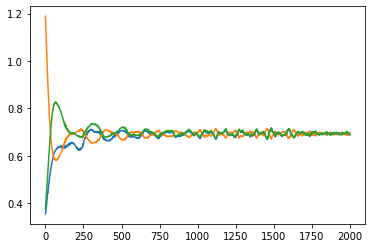

In [16]:
plt.plot(loss_d1)
plt.plot(loss_d2)
plt.plot(loss_g)


In [17]:
gen(z)

tensor([[7.1235e-04, 6.2651e-01, 6.0732e-04, 6.7684e-01],
        [7.1161e-04, 2.6114e-01, 6.0683e-04, 5.0138e-02],
        [7.1158e-04, 2.4607e-01, 6.0681e-04, 4.1896e-02],
        ...,
        [7.1248e-04, 6.8686e-01, 6.0741e-04, 7.9790e-01],
        [7.1178e-04, 3.3416e-01, 6.0694e-04, 1.0786e-01],
        [7.1189e-04, 3.8897e-01, 6.0702e-04, 1.7498e-01]], device='cuda:0',
       grad_fn=<SigmoidBackward>)

In [31]:
z1 = np.random.randn(1000,1)
z = torch.tensor(z1,device = 'cuda:0').float() 
x = gen(z)  

(array([103.,  82., 112., 109., 100., 104.,  98.,  86.,  92., 114.]),
 array([6.66387712e-04, 1.00587229e-01, 2.00508070e-01, 3.00428911e-01,
        4.00349752e-01, 5.00270593e-01, 6.00191435e-01, 7.00112276e-01,
        8.00033117e-01, 8.99953958e-01, 9.99874799e-01]),
 <a list of 10 Patch objects>)

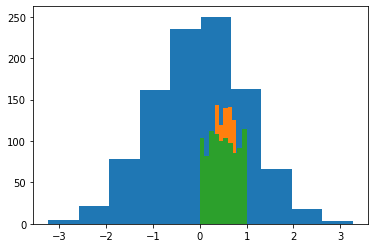

In [32]:
plt.hist(z1)
plt.hist(x[:,1].detach().cpu().numpy())
plt.hist(np.random.uniform(0,1,(1000,4))[:,1])